In [91]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
plt.style.use("fivethirtyeight")

In [92]:
def euler(f, x, y0):
    n = np.shape(x)[0]
    # initializing the vector y as an array of zeros
    y = np.zeros(n)
    dx = x[1] - x[0]
    y[0] = y0
    y[1] = y0 + dx * f(x[0],y[0])
    for i in range(n-1):
        y[i+1] = y[i] + dx*f(x[i],y[i])
    return y

In [93]:
def euler_step(f, x, y0, h):
    n = np.shape(x)[0]
    # initializing the vector y as an array of zeros
    y = np.zeros(n)
    y[0] = y0
    y[1] = y0 + h * f(x[0],y[0])
    for i in range(n-1):
        y[i+1] = y[i] + h*f(x[i],y[i])
    return y

In [94]:
def midpoint(f, x, y0):
    n = np.shape(x)[0]
    # initializing the vector y as an array of zeros
    y = np.zeros(n)
    dx = x[1] - x[0]
    y[0] = y0
    y[1] = y0 + dx * f(x[0],y[0])
    for i in range(n-1):
        k1 = f(x[i], y[1])
        k2 = f(x[i] + dx, y[i] + k1 * dx)
        y[i+1] = y[i] + dx * (k1 + k2) / 2
    return y

In [95]:
def midpoint_step(f,x,y0,h):
    n = np.shape(x)[0]
    # initializing the vector y as an array of zeros
    y = np.zeros(n)
    y[0] = y0
    y[1] = y0 + h * f(x[0],y[0])
    for i in range(n-1):
        k1 = f(x[i], y[1])
        k2 = f(x[i] + h, y[i] + k1 * h)
        y[i+1] = y[i] + h * (k1 + k2) / 2
    return y

In [96]:
f = lambda x, y: np.sin(x)
x = np.linspace(0, 2*np.pi/100, 10)
x1 = np.linspace(0, 2*np.pi, 10)
yExact = lambda x: 2 - np.cos(x)
yEuler = euler(f, x, 1.0)
yEulerStep = euler_step(f, x1, 1.0, 2*np.pi/100)
yEulerStep2 = euler_step(f,x1, 1.0, 2*np.pi/50)
yEulerStep3 = euler_step(f,x1, 1.0, 2*np.pi/25)
yMidpoint = midpoint(f, x, 1.0)
yMidpointStep = midpoint_step(f,x,1.0,2*np.pi/100)
yMidpointStep1 = midpoint_step(f,x,1.0,2*np.pi/50)
yMidpointStep2 = midpoint_step(f,x,1.0,2*np.pi/25)
yMidpointStep3 = midpoint_step(f,x,1.0,2*np.pi/10)
errEuler = norm(yEulerStep - yExact(x)) / norm(yExact(x)) * 100
errEulerStep2 = norm(yEulerStep2 - yExact(x)) / norm(yExact(x)) * 100
errEulerStep3 = norm(yEulerStep3 - yExact(x)) / norm(yExact(x)) * 100
errMidpoint = norm(yMidpoint - yExact(x)) / norm(yExact(x)) * 100
errMidpointStep1 = norm(yMidpointStep1 - yExact(x)) / norm(yExact(x)) * 100
errMidpointStep2 = norm(yMidpointStep2 - yExact(x)) / norm(yExact(x)) * 100
errMidpointStep3 = norm(yMidpointStep3 - yExact(x)) / norm(yExact(x)) * 100

print(errEuler)
print(errEulerStep2)
print(errEulerStep3)
print(errMidpointStep1)
print(errMidpointStep2)
print(errMidpointStep3)

10.190527885523629
20.43113388204733
40.912587143935816
5.544503058110415
19.402703671003714
104.86175511323121


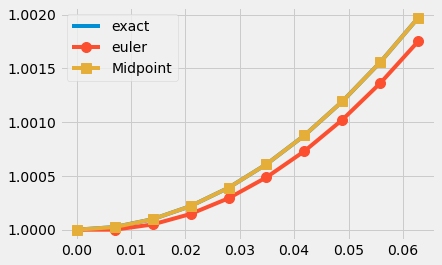

In [97]:
fig = plt.figure(1); plt.clf()
ax = fig.add_subplot(1,1,1)
ax.plot(x, yExact(x), label = "exact")
ax.plot(x, yEuler, "-o", label = "euler", markersize = 10)
# ax.plot(x, yEuler1, "-o", label = "euler1", markersize = 10)
ax.plot(x, yMidpoint, "-s", label = "Midpoint", markersize = 10)
ax.legend()